# Data Wrangling

## Files Formating

In [0]:
# Deleting files from DataBricks db
# dbutils.fs.rm("/FileStore/tables/pvpapn_2021_03_18_anexos_minimercado_semanal.xlsx")

In [0]:
!pip install openpyxl

Collecting openpyxl
 Downloading openpyxl-3.0.9-py2.py3-none-any.whl (242 kB)
█▍ | 10 kB 5.2 MB/s eta 0:00:01 |██▊ | 20 kB 8.6 MB/s eta 0:00:01 |████ | 30 kB 11.3 MB/s eta 0:00:01 |█████▍ | 40 kB 13.6 MB/s eta 0:00:01 |██████▊ | 51 kB 9.6 MB/s eta 0:00:01 |████████▏ | 61 kB 10.0 MB/s eta 0:00:01 |█████████▌ | 71 kB 7.7 MB/s eta 0:00:01 |██████████▉ | 81 kB 8.6 MB/s eta 0:00:01 |████████████▏ | 92 kB 7.8 MB/s eta 0:00:01 |█████████████▌ | 102 kB 8.5 MB/s eta 0:00:01 |██████████████▉ | 112 kB 8.5 MB/s eta 0:00:01 |████████████████▎ | 122 kB 8.5 MB/s eta 0:00:01 |█████████████████▋ | 133 kB 8.5 MB/s eta 0:00:01 |███████████████████ | 143 kB 8.5 MB/s eta 0:00:01 |████████████████████▎ | 153 kB 8.5 MB/s eta 0:00:01 |█████████████████████▋ | 163 kB 8.5 MB/s eta 0:00:01 |███████████████████████ | 174 kB 8.5 MB/s eta 0:00:01 |████████████████████████▍ | 184 kB 8.5 MB/s eta 0:00:01 |█████████████████████████▊ | 194 kB 8.5 MB/s eta 0:00:01 |███████████████████████████ | 204 kB 8.5 MB/s eta 0:00:01 |████████████████████████████▍ | 215 kB 8.5 MB/s eta 0:00:01 |█████████████████████████████▊ | 225 kB 8.5 MB/s eta 0:00:01 |███████████████████████████████▏| 235 kB 8.5 MB/s eta 0:00:01 |████████████████████████████████| 242 kB 8.5 MB/s 
Collecting et-xmlfile
 Downloading et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)
Installing collected packages: et-xmlfile, openpyxl
Successfully installed et-xmlfile-1.1.0 openpyxl-3.0.9
 WARNING: You are using pip version 20.2.4; however, version 21.2.4 is available.
You should consider upgrading via the '/databricks/python3/bin/python -m pip install --upgrade pip' command.

In [0]:
import pandas as pd
import numpy as np


In [0]:
# Paths
f1 = "/dbfs/FileStore/tables/ProjectTeam3/PVPAPN_2020_dic_laguna_de_datos_tiendas_descuento_duro.xlsx"
f2 = "/dbfs/FileStore/tables/ProjectTeam3/PVPAPN_2020_ago_laguna_de_datos_tiendas_descuento_duro.xlsx"
f3 = "/dbfs/FileStore/tables/ProjectTeam3/PVPAPN_2020_nov_laguna_de_datos_tiendas_descuento_duro.xlsx"
f4 = "/dbfs/FileStore/tables/ProjectTeam3/PVPAPN_2020_oct_laguna_de_datos_tiendas_descuento_duro.xlsx"
f5 = "/dbfs/FileStore/tables/ProjectTeam3/PVPAPN_2020_sep_laguna_de_datos_tiendas_descuento_duro.xlsx"
f6 = "/dbfs/FileStore/tables/ProjectTeam3/PVPAPN_2021_ene_laguna_de_datos_tiendas_descuento_duro.xlsx"
f7 = "/dbfs/FileStore/tables/ProjectTeam3/PVPAPN_2021_feb_laguna_de_datos_tiendas_descuento_duro.xlsx"
f8 = "/dbfs/FileStore/tables/ProjectTeam3/PVPAPN_2021_mar_laguna_de_datos_tiendas_descuento_duro.xlsx"
files_path = [f1, f2, f3, f4, f5, f6, f7, f8]

In [0]:
def data_format(file_path, sheet=0):
  
  month_name = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']
  month_num = [x for x in range(1, 13)]
  month = dict(zip(month_name, month_num))

  df = pd.read_excel(file_path, sheet_name=sheet,engine='openpyxl')
    
  date = df.iloc[4,:1][0]
  date = date.split('de')
  date = ''.join(date)
  date = date.split('hasta')
  date = ''.join(date)
  date = date.split()
  print(date)
  
  m = str(month[date[1]])
  y = date[-1]
  print(m, y)
  
  def get_dates(arr):
    di = int(arr[0])
    df = int(arr[3])
    m = month[arr[1]]
    y = arr[-1]
    dates = [str(y) + '-' + str(m) + '-' + str(i) for i in range(di, df+1)]
    return dates

  D = get_dates(date)
  print(D)
  
  dfc = df.iloc[6:,:]
  
  headers = list(dfc.iloc[1,:8]) + list(dfc.iloc[0,8:])
  dfc.columns = headers
  dfc = dfc.drop(dfc.index[[0, 1]])
  dfc = dfc[dfc.columns.dropna()]
  to_drop = dfc.filter(regex=date[1]).columns
  dfc = dfc.drop(to_drop, axis=1)
  dfc[dfc.filter(regex=y).columns] = dfc[dfc.filter(regex=y).columns].astype(float)
  headers_n = list(dfc.columns[:8]) + D
  print(headers_n)
  dfc.columns = headers_n

  dfc_municipio = dfc.groupby(['Municipio']).mean().copy()
  dfc_municipio = dfc_municipio.T
  
  return dfc_municipio


In [0]:
#df = data_format(f_x, 0)
#df
# The function would work if all files had the same format

In [0]:
df = pd.read_excel(f2, sheet_name=1,engine='openpyxl')

In [0]:
month_name = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']
month_num = [x for x in range(1, 13)]
month = dict(zip(month_name, month_num))



date = df.iloc[4,:1][0]
date = date.split('de')
date = ''.join(date)
date = date.split('hasta')
date = ''.join(date)
date = date.split()
print(date)

m = str(month[date[1]])
y = date[-1] #'2020'
print(m, y)

['16', 'agosto', '31', 'agosto']
8 agosto

In [0]:
def get_dates(arr):
  di = int(arr[0])
  df = int(arr[2])
  m = month[arr[1]]
  y = arr[-1] #2020
  dates = [str(y) + '-' + str(m) + '-' + str(i) for i in range(di, df+1)]
  return dates

D = get_dates(date)
print(D)

dfc = df.iloc[6:,:] ## 7
headers = list(dfc.iloc[1,:8]) + list(dfc.iloc[0,8:])
dfc.columns = headers
dfc = dfc.drop(dfc.index[[0, 1]])
#dfc = dfc.iloc[:90000,:40] ##
to_drop = dfc.filter(regex=date[1]).columns
print(to_drop)
dfc = dfc.drop(to_drop, axis=1)
#dfc = dfc[dfc.columns.dropna()] ##
#dfc = dfc.iloc[:,:-3] ##
dfc

['agosto-8-16', 'agosto-8-17', 'agosto-8-18', 'agosto-8-19', 'agosto-8-20', 'agosto-8-21', 'agosto-8-22', 'agosto-8-23', 'agosto-8-24', 'agosto-8-25', 'agosto-8-26', 'agosto-8-27', 'agosto-8-28', 'agosto-8-29', 'agosto-8-30', 'agosto-8-31']
Float64Index([], dtype='float64')
Out[290]:

NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 
 
 8 
 Nombre DANE 
 Código de barras 
 Nombre producto 
 Unidad de Medida 
 Marca 
 Empresa 
 DIVIPOLA 
 Municipio 
 Precio Implícito 
 Precio Reportado 
 Precio Implícito 
 Precio Reportado 
 Precio Implícito 
 Precio Reportado 
 Precio Implícito 
 Precio Reportado 
 Precio Implícito 
 Precio Reportado 
 Precio Implícito 
 Precio Reportado 
 Precio Implícito 
 Precio Reportado 
 Precio Implícito 
 Precio Reportado 
 Precio Implícito 
 Precio Reportado 
 Precio Implícito 
 Precio Reportado 
 Precio Implícito 
 Precio Reportado 
 Precio Implícito 
 Precio Reportado 
 Precio Implícito 
 Precio Reportado 
 Precio Implícito 
 Precio Reportado 
 Precio Implícito 
 Precio Reportado 
 Precio Implícito 
 Precio Reportado 
 NaN 
 NaN 
 NaN 
 
 
 9 
 Aceite de girasol 
 7701018007151 
 CAJ.ACEITE GIRASOL PREMIER X1000CC 
 Centímetros cúbicos 
 PREMIER 
 ABASTECEMOS DE OCCIDENTE S.A. 
 76520 
 Palmira 
 NaN 
 NaN 
 NaN 
 NaN 
 11333.3 
 9664 
 11500 
 9664 
 11400 
 9664 
 NaN 
 NaN 
 11333.3 
 9664 
 11000 
 9664 
 NaN 
 NaN 
 NaN 
 NaN 
 11400 
 9664 
 NaN 
 NaN 
 11400 
 9664 
 11333.3 
 9664 
 NaN 
 NaN 
 11000 
 9664 
 NaN 
 NaN 
 NaN 
 
 
 10 
 Aceite de girasol 
 7701018007212 
 CAJ.ACEITE GIRASOL PREMIER X500CC 
 Centímetros cúbicos 
 PREMIER 
 ABASTECEMOS DE OCCIDENTE S.A. 
 76520 
 Palmira 
 NaN 
 NaN 
 NaN 
 NaN 
 6500 
 5504 
 6333.33 
 5504 
 6000 
 5504 
 6000 
 5504 
 6000 
 5504 
 NaN 
 NaN 
 NaN 
 NaN 
 6500 
 5504 
 6000 
 5504 
 6000 
 5504 
 6000 
 5504 
 6333.33 
 5504 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 11 
 Aceite de girasol 
 7701018007250 
 CAJ.ACEITE GIRASOL PREMIER X2000CC. 
 Centímetros cúbicos 
 PREMIER 
 ABASTECEMOS DE OCCIDENTE S.A. 
 76520 
 Palmira 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 21000 
 18151 
 21000 
 18151 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 21000 
 18151 
 21000 
 18151 
 NaN 
 NaN 
 NaN 
 NaN 
 21000 
 18151 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 12 
 Aceite de girasol 
 7701018065991 
 CAJ.ACEITE GIRASOL OLEOCALI X900CC. 
 Centímetros cúbicos 
 OLEOCALI 
 ABASTECEMOS DE OCCIDENTE S.A. 
 76520 
 Palmira 
 NaN 
 NaN 
 NaN 
 NaN 
 8000 
 6891 
 8000 
 6891 
 8000 
 6891 
 8000 
 6891 
 8000 
 6891 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 8000 
 6891 
 8000 
 6891 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 84941 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 84942 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 84943 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 84944 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 84945 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 N

In [0]:
headers_n = list(dfc.columns[:8]) + D
print(headers_n)
dfc.columns = headers_n
dfc[dfc.filter(regex=y).columns] = dfc[dfc.filter(regex=y).columns].astype(float)
dfc_municipio = dfc.groupby(['Municipio']).mean().copy()
dfc_municipio = dfc_municipio.T


[nan, nan, nan, nan, nan, nan, nan, nan, 'agosto-8-16', 'agosto-8-17', 'agosto-8-18', 'agosto-8-19', 'agosto-8-20', 'agosto-8-21', 'agosto-8-22', 'agosto-8-23', 'agosto-8-24', 'agosto-8-25', 'agosto-8-26', 'agosto-8-27', 'agosto-8-28', 'agosto-8-29', 'agosto-8-30', 'agosto-8-31']

--------------------------------------------------------------------------- 
 ValueError Traceback (most recent call last)
 <command-3767899350778070> in <module> 
 1 headers_n = list ( dfc . columns [ : 8 ] ) + D
 2 print ( headers_n ) 
 ----> 3 dfc . columns = headers_n
 4 dfc [ dfc . filter ( regex = y ) . columns ] = dfc [ dfc . filter ( regex = y ) . columns ] . astype ( float ) 
 5 dfc_municipio = dfc . groupby ( [ 'Municipio' ] ) . mean ( ) . copy ( ) 

 /databricks/python/lib/python3.8/site-packages/pandas/core/generic.py in __setattr__ (self, name, value) 
 5152 try : 
 5153 object . __getattribute__ ( self , name ) 
 -> 5154 return object . __setattr__ ( self , name , value ) 
 5155 except AttributeError : 
 5156 pass 

 pandas/_libs/properties.pyx in pandas._libs.properties.AxisProperty.__set__ () 

 /databricks/python/lib/python3.8/site-packages/pandas/core/generic.py in _set_axis (self, axis, labels) 
 562 def _set_axis ( self , axis : int , labels : Index ) -> None : 
 563 labels = ensure_index ( labels ) 
 --> 564 self . _mgr . set_axis ( axis , labels ) 
 565 self . _clear_item_cache ( ) 
 566 

 /databricks/python/lib/python3.8/site-packages/pandas/core/internals/managers.py in set_axis (self, axis, new_labels) 
 224 
 225 if new_len != old_len : 
 --> 226 raise ValueError(
 227 f"Length mismatch: Expected axis has {old_len} elements, new " 
 228 f"values have {new_len} elements" 

 ValueError : Length mismatch: Expected axis has 43 elements, new values have 24 elements

In [0]:
dfc_municipio

--------------------------------------------------------------------------- 
 NameError Traceback (most recent call last)
 <command-3767899350778074> in <module> 
 ----> 1 dfc_municipio

 NameError : name 'dfc_municipio' is not defined

In [0]:
dfc_municipio.to_csv("/dbfs/FileStore/tables/ProjectTeam3/PVPAPN_2020_ago_laguna_de_datos_tiendas_descuento_duro_2.csv")

## Files Concat

In [0]:
# Recordar cargar los datos sin index así:
# d = pd.read_csv("/dbfs/FileStore/tables/ProjectTeam3/PVPAPN_2020_oct_laguna_de_datos_tiendas_descuento_duro.csv", index_col=0)

In [0]:
!pip install openpyxl

In [0]:
import pandas as pd
import numpy as np

In [0]:
f1 = "/dbfs/FileStore/tables/ProjectTeam3/PVPAPN_2020_dic_laguna_de_datos_tiendas_descuento_duro.csv"
f12 = "/dbfs/FileStore/tables/ProjectTeam3/PVPAPN_2020_dic_laguna_de_datos_tiendas_descuento_duro_2.csv"
f2 = "/dbfs/FileStore/tables/ProjectTeam3/PVPAPN_2020_ago_laguna_de_datos_tiendas_descuento_duro.csv"
f22 = "/dbfs/FileStore/tables/ProjectTeam3/PVPAPN_2020_ago_laguna_de_datos_tiendas_descuento_duro_2.csv"
f3 = "/dbfs/FileStore/tables/ProjectTeam3/PVPAPN_2020_nov_laguna_de_datos_tiendas_descuento_duro.csv"
f32 = "/dbfs/FileStore/tables/ProjectTeam3/PVPAPN_2020_nov_laguna_de_datos_tiendas_descuento_duro_2.csv"
f4 = "/dbfs/FileStore/tables/ProjectTeam3/PVPAPN_2020_oct_laguna_de_datos_tiendas_descuento_duro.csv"
f42 = "/dbfs/FileStore/tables/ProjectTeam3/PVPAPN_2020_oct_laguna_de_datos_tiendas_descuento_duro_2.csv"
f5 = "/dbfs/FileStore/tables/ProjectTeam3/PVPAPN_2020_sep_laguna_de_datos_tiendas_descuento_duro.csv"
f52 = "/dbfs/FileStore/tables/ProjectTeam3/PVPAPN_2020_sep_laguna_de_datos_tiendas_descuento_duro_2.csv"
f6 = "/dbfs/FileStore/tables/ProjectTeam3/PVPAPN_2021_ene_laguna_de_datos_tiendas_descuento_duro.csv"
f62 = "/dbfs/FileStore/tables/ProjectTeam3/PVPAPN_2021_ene_laguna_de_datos_tiendas_descuento_duro_2.csv"
f7 = "/dbfs/FileStore/tables/ProjectTeam3/PVPAPN_2021_feb_laguna_de_datos_tiendas_descuento_duro.csv"
f72 = "/dbfs/FileStore/tables/ProjectTeam3/PVPAPN_2021_feb_laguna_de_datos_tiendas_descuento_duro_2.csv"
f8 = "/dbfs/FileStore/tables/ProjectTeam3/PVPAPN_2021_mar_laguna_de_datos_tiendas_descuento_duro.csv"
files_path = [f1, f12, f2, f22, f3, f32, f4, f42, f5, f52, f6, f62, f7, f72, f8]

In [0]:
d = pd.read_csv(f22, index_col=0)
d

In [0]:
files_df = []
for file in files_path:
  df = pd.read_csv(file, index_col = 0)
  files_df.append(df)
  

In [0]:
Data = pd.concat(files_df)
Data = Data.sort_index()
Data.to_csv("/dbfs/FileStore/tables/ProjectTeam3/CompleteData.csv")
Data

--------------------------------------------------------------------------- 
 NameError Traceback (most recent call last)
 <command-1921892434282607> in <module> 
 ----> 1 Data = pd . concat ( files_df ) 
 2 Data = Data . sort_index ( ) 
 3 Data . to_csv ( "/dbfs/FileStore/tables/ProjectTeam3/CompleteData.csv" ) 
 4 Data

 NameError : name 'files_df' is not defined

# Descriptive Statistics

## Data Exploration

In [0]:
import pandas as pd
import datetime 

In [0]:
CompleteData = pd.read_csv("/dbfs/FileStore/tables/ProjectTeam3/CompleteData.csv", index_col=0)
CompleteData.index = pd.to_datetime(CompleteData.index)
CompleteData

Out[5]:

Abejorral 
 Abrego 
 Acacias 
 Acevedo 
 Agrado 
 Agua De Dios 
 Aguachica 
 Aguadas 
 Aguazul 
 Agustín Codazzi 
 Aipe 
 Albania 
 Alcalá 
 Altamira 
 Alvarado 
 Amagá 
 Amalfi 
 Ambalema 
 Anapoima 
 Andalucía 
 Andes 
 Angostura 
 Anolaima 
 Anserma 
 Ansermanuevo 
 Anzoátegui 
 Apartadó 
 Apia 
 Apulo 
 Aquitania 
 Aracataca 
 Aranzázu 
 Arauca 
 Arboletes 
 Argelia 
 Ariguaní 
 Arjona 
 Armenia 
 Armero 
 Astrea 
 ... 
 Zipacón 
 Zipaquirá 
 Zona Bananera 
 Ísnos 
 Casabianca 
 Castilla La Nueva 
 Chipaque 
 Guachetá 
 Ituango 
 Mesetas 
 Puerto Lleras 
 Soatá 
 Villahermosa 
 Providencia Y Santa Catalina 
 San Cristóbal 
 Armenia Antioquia 
 Vigía Del Fuerte 
 Gámbita 
 Hato 
 Icononzo 
 La Belleza 
 La Llanada 
 Macaravita 
 Falan 
 Segovia 
 Caloto 
 Distracción 
 Filadelfia 
 Guática 
 Miraflores 
 Palocabildo 
 Rovira 
 Valencia 
 Victoria 
 Consacá 
 Murillo 
 Prado 
 Gachetá 
 Supatá 
 Monitos 
 
 
 
 
 2020-10-01 
 4144.782609 
 5386.060606 
 5939.692308 
 6050.714286 
 5605.294118 
 4783.312500 
 6956.521739 
 4188.800000 
 6491.578947 
 7588.800000 
 6100.000000 
 13426.500000 
 3761.438596 
 7453.000000 
 5519.444444 
 4438.372093 
 4063.809524 
 3855.333333 
 6107.151881 
 3960.655738 
 4346.666667 
 NaN 
 4291.647059 
 4209.320000 
 3446.285714 
 NaN 
 5566.558824 
 3842.488889 
 3659.025641 
 8203.950000 
 5200.370370 
 4475.324324 
 NaN 
 4187.125000 
 3709.166667 
 4976.964286 
 5202.341615 
 6435.346616 
 3923.440000 
 5787.500000 
 ... 
 3943.684211 
 6520.058915 
 3623.108108 
 5789.230769 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 4000.0 
 3640.869565 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 2020-10-10 
 4625.200000 
 4855.277778 
 5954.256468 
 5594.782609 
 5667.000000 
 4627.898551 
 6645.934066 
 3911.818182 
 5782.368421 
 7455.322581 
 5245.500000 
 5033.333333 
 3858.644068 
 6373.750000 
 6109.411765 
 4903.260870 
 4211.363636 
 4450.666667 
 6013.456376 
 3454.264706 
 4397.500000 
 3585.294118 
 3531.046512 
 3559.736842 
 3843.934426 
 5502.500000 
 4477.903614 
 4064.358491 
 3946.714286 
 5590.000000 
 4228.327586 
 4563.974359 
 15816.666667 
 4302.071429 
 3720.000000 
 3296.428571 
 4990.975826 
 8671.183045 
 3229.074074 
 5809.500000 
 ... 
 4078.260870 
 8354.826109 
 3017.428571 
 5824.000000 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 2020-10-11 
 4485.000000 
 5156.969697 
 5146.898148 
 6076.111111 
 5642.173913 
 4513.895522 
 5726.162791 
 4201.600000 
 5130.000000 
 6080.653941 
 5500.000000 
 3226.500000 
 3617.622951 
 4664.615385 
 6359.375000 
 4412.820513 
 4260.000000 
 3891.666667 
 5609.335938 
 4335.746479 
 4301.600000 
 3797.058824 
 3707.972973 
 3703.421053 
 3543.931034 
 5507.500000 
 4153.031746 
 3556.108696 
 3647.916667 
 4377.333333 
 2972.857143 
 3937.763158 
 17200.000000 
 3684.704918 
 4522.222222 
 4100.000000 
 5869.078383 
 8029.238960 
 3220.800000 
 5547.142857 
 ... 
 4007.619048 
 8009.751269 
 3406.911765 
 5142.173913 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 2020-10-12 
 4157.272727 
 4680.571429 
 6263.155738 
 NaN 
 5053.684211 
 4302.368421 
 6852.244186 
 3699.473684 
 4536.216216 
 7877.448276 
 5687.272727 
 NaN 
 4082.169811 
 5515.500000 
 4745.454545 
 4405.250000 
 4263.500000 
 4510.833333 
 6018.604478 
 4442.708333 
 4256.818182 
 4112.142857 
 4260.657895 
 3848.039216 
 3270.625000 
 4515.833333 
 4275.661538 
 3672.272727 
 4098.593750 
 4483.200000 
 3934.107143 
 3497.205882 
 86700.000000 
 3776.724138 
 3705.555556 
 3294.941799 
 4937.382672 
 

In [0]:
year_mean = CompleteData.groupby(CompleteData.index.year).mean()
year_mean=year_mean.transpose()
year_mean_df = spark.createDataFrame(year_mean.reset_index(drop=False))
display(year_mean_df)

index 2020 2021 Abejorral 4196.527350882446 4496.772353387277 Abrego 4863.055718287415 5328.676556179774 Acacias 5856.135372762664 5844.065538201027 Acevedo 5401.591605394817 5900.587700984931 Agrado 5294.219547264223 5563.599449152997 Agua De Dios 4453.132372270369 4534.085183278227 Aguachica 6885.20489410476 6981.4507605277495 Aguadas 3937.7145821546314 4081.6106222834455 Aguazul 5178.862738594536 5420.093557361992 Agustín Codazzi 6914.084691058939 6452.98210360122 Aipe 5154.110491471468 5490.2858102981145 Albania 9269.4859437751 12042.37111111111 Alcalá 3991.616283235343 4577.539481752972 Altamira 5308.595535769221 5660.09718401045 Alvarado 5549.188208403447 6206.91858236184 Amagá 4529.540250145576 4886.525185739454 Amalfi 4076.026287794141 4243.885374850195 Ambalema 4090.6212243935474 4391.23425898006 Anapoima 6393.65308508399 6387.034167252688 Andalucía 4241.491678074686 4609.790995548626 Andes 4257.446847972498 4472.061161657027 Angostura 4050.076616242915 4098.145443550655 Anolaima 4055.5967571156243 4061.683515305015 Anserma 4312.348583927605 4589.605185429051 Ansermanuevo 3804.5327011417294 4242.493906533333 Anzoátegui 5698.783410173188 6021.790501222181 Apartadó 5682.976740422131 6127.758035667214 Apia 4046.2537523220494 4584.860014610466 Apulo 4036.1077649640365 4316.982329367334 Aquitania 5367.949010052943 5523.829579743451 Aracataca 4866.156202279591 5032.947261820125 Aranzázu 4041.6908635809523 4672.967766755801 Arauca 10898.43611265278 6712.312083749583 Arboletes 4503.880569523715 4652.145244480588 Argelia 3965.1365840366234 4417.0085736966785 Ariguaní 4721.2849092191045 4410.819197241775 Arjona 5542.277166605708 5779.963118513971 Armenia 7299.355411818362 7632.495954381124 Armero 4092.8866272047835 4667.842057551009 Astrea 5569.630638905849 6005.839070078659 Ataco 3936.4513262939167 4205.68308582137 Ayapel 4601.637872818404 4742.0709447975805 Baranoa 5417.0395890333 5661.562984813132 Barbosa 6090.720952078893 5865.986430096818 Barbosa Antioquia 5634.655127273335 6387.632798790949 Barrancabermeja 7961.973327403251 8036.614757772634 Barrancas 9146.139313099027 8350.438550725632 Barranquilla 11362.405941830983 11391.375286039145 Becerríl 5285.947049160571 5599.641376716059 Belalcázar 4006.936765251057 4380.46578298914 Bello 7662.628493272767 7903.4994231471155 Belén 4485.274387000328 4621.454744771309 Belén De Los Andaquies 5350.937953915388 5652.236511752086 Belén De Umbria 4108.533473408815 4357.521426436729 Betania 3927.788549044848 4426.363799341422 Betulia 4155.209278175211 4245.702399748016 Bogotá D.C. 12102.98154666461 12107.735210034329 Bojacá 4554.9512026457305 4591.492148417007 Bolívar 3768.9624435524165 3921.5418611323757 Bolívar Cauca 17163.598045935545 17731.820743145738 Bosconia 5714.874360577969 6068.738202603019 Boyacá 10410.39112423287 10673.32576623559 Bucaramanga 9526.632932900793 9679.989961801663 Buenaventura 7559.407014416015 7765.852043829362 Buenavista Córdoba 10316.976473922901 6267.1274509803925 Buesaco 4348.505294848526 4540.870207742387 Buga 7331.103198861551 7606.55962217432 Bugalagrande 5566.304026887708 5736.418408095932 Cachipay 5221.834829499546 5655.803880310641 Caicedonia 4930.842938692428 5575.810984558874 Cajamarca 5074.2231821903915 5099.902639896012 Cajicá 7700.387023654208 8300.780411402095 Calamar_Bolívar 4454.745472320237 4679.377189229614 Calarcá 4866.222964606434 5289.060898663462 Caldas 6469.599658943417 7368.399079089277 Cali 9746.153568935342 10067.733386659858 Calima 4447.109469611746 4696.829703708762 Campo De La Cruz 3847.752205411354 4280.462024382714 Campoalegre 6688.956349187512 6592.425517109733 Candelaria 6759.677496560007 6864.8391092129 Candelaria_Valle Del Cauca 6404.076174698774 6539.949806923549 Caparrapí 4045.8084380549003 4228.176608182791 Carepa 5025.468755100933 5131.600135293527 Carmen De Apicalá 4575.878411958495 4674.678392195268 Carmen De Víboral 5713.236087237265 6050.537657771246 Cartagena 11030.38446522383 10966.64153413738 Cartago 7133.4070990

In [0]:
displayHTML("<h3>Precio Promedio por ciudades Año 2020 y 2021</h3><p>La diferencia entre ciudades es marcada en Comparacion de los municipios y las ciudades principales, tenemos valores atipicos como lo son Villagarzon o Valle del Guamuez los cuales son municipios pertenecientes al Putumayo, dandonos indicios de los precios elevados por el acceso de los mismos</p>")

Precio Promedio por ciudades Año 2020 y 2021 La diferencia entre ciudades es marcada en Comparacion de los municipios y las ciudades principales, tenemos valores atipicos como lo son Villagarzon o Valle del Guamuez los cuales son municipios pertenecientes al Putumayo, dandonos indicios de los precios elevados por el acceso de los mismos

In [0]:
CompleteData2=CompleteData.reset_index()

In [0]:
from pyspark.sql.types import StructType,StructField, StringType, IntegerType

sparkDF=spark.createDataFrame(CompleteData2)

                    


In [0]:
display(sparkDF)

index Abejorral Abrego Acacias Acevedo Agrado Agua De Dios Aguachica Aguadas Aguazul Agustín Codazzi Aipe Albania Alcalá Altamira Alvarado Amagá Amalfi Ambalema Anapoima Andalucía Andes Angostura Anolaima Anserma Ansermanuevo Anzoátegui Apartadó Apia Apulo Aquitania Aracataca Aranzázu Arauca Arboletes Argelia Ariguaní Arjona Armenia Armero Astrea Ataco Ayapel Baranoa Barbosa Barbosa Antioquia Barrancabermeja Barrancas Barranquilla Becerríl Belalcázar Bello Belén Belén De Los Andaquies Belén De Umbria Betania Betulia Bogotá D.C. Bojacá Bolívar Bolívar Cauca Bosconia Boyacá Bucaramanga Buenaventura Buenavista Córdoba Buesaco Buga Bugalagrande Cachipay Caicedonia Cajamarca Cajicá Calamar_Bolívar Calarcá Caldas Cali Calima Campo De La Cruz Campoalegre Candelaria Candelaria_Valle Del Cauca Caparrapí Carepa Carmen De Apicalá Carmen De Víboral Cartagena Cartago Caucasia Cereté Chachaguí Chaparral Charalá Chigorodó Chimichagua Chinchiná Chinácota Chinú Chiquinquirá Chiriguaná Chivolo Choachí Chocontá Chía Cimitarra Circasia Cisneros Ciudad Bolívar Ciénaga Ciénaga De Oro Cocorná Cogua Colón Concordia Copacabana Corinto Corozal Cota Coveñas Coyaima Cumaral Curití Curumaní Cúcuta Dabeiba Daguá Don Matías Dosquebradas Duitama Ebejicó El Banco El Carmen El Carmen De Atrato El Carmen De Bolívar El Carmen De Chucurí El Cerrito El Colegio El Copey El Doncello El Dóvio El Paso El Paujil El Playón El Retén El Rosal El Zúlia Entrerrios Envigado Espinal Facatativá Finlandia Flandes Florencia Florida Floridablanca Fonseca Fredonia Fresno Frontino Fuente De Oro Fundación Funza Fusagasugá Fómeque Gachancipá Gachantivá Galapa Galeras Gamarra Garagoa Garzón Gigante Ginebra Girardot Girardota Girón Granada Guacarí Guadalupe Guaduas Guamal Guamo Guarne Guasca Guatapé Guatavita Guateque Hatonuevo Herveo Hispania Hobo Honda Ibagué Ipiales Itaguí Itsmina Jamundí Jardín Jericó Juan De Acosta La Apartada La Calera La Ceja La Dorada La Estrella La Jagua De Ibirico La Mesa La Paz La Pintada La Plata La Tebaida La Unión La Vega La Victoria La Virginia Lebrija Lenguazaque Leticia Liborina Lorica Los Patios Los Santos Luruaco Lérida Líbano Madrid Magangué Maicao Majagual Malambo Manatí Manaure Manizales Manzanares Maní Maria La Baja Marinilla Mariquita Marsella Medellín Melgar Miranda Mocoa Mompós Momíl Moniquirá Montelíbano Montenegro Monterrey Montería Mosquera Mutatá Málaga Nariño Natagaima Necoclí Neira Neiva Nemocón Nilo Nobsa Nocaima Obando Ocaña Oiba Oporapa Ortega Ovejas Pacho Paicol Pailitas Paipa Palermo Palestina Palmar De Varela Palmira Palmito Pamplona Pasto Patía Paz De Ariporo Pelaya Pereira Peñol Piamonte Piedecuesta Piendamó Pitalito Pivijay Planadas Planeta Rica Plato Polonuevo Ponedera Popayán Poré Pradera Pueblo Nuevo Pueblo Rico Pueblorrico Puente Nacional Puerto Asís Puerto Berrio Puerto Boyacá Puerto Colombia Puerto Gaitán Puerto Libertador Puerto Lopez Puerto Rico Puerto Salgar Puerto Tejada Puerto Triunfo Puerto Wilches Purificación Quibdó Quimbaya Quinchía Ramiriquí Repelón Restrepo Retiro Ricaurte Rio De Oro Riofrio Riohacha Rionegro Riosucio Risaralda Rivera Roldanillo Ráquira Sabana De Torres Sabanagrande Sabanalarga Sabaneta Sahagún Saladoblanco Salamina Saldaña Salgar Samacá Sampués San Agustín San Alberto San Andres San Andres - Antioquia San Andres Sotavento San Antero San Bernardo Del Viento San Carlos San Diego San Francisco San Gil San Jacinto San Jerónimo San Jose De La Montaña San Jose Del Fragua San Jose Del Guaviare San Juan De Rio Seco San Juan De Urabá San Juan Del Cesar San Juan Nepomuceno San Luis San Marcos San Martín San Onofre San Pablo San Pedro San Pedro De Urabá San Pelayo San Rafael San Roque San Vicente San Vicente De Chucuri San Vicente Del Caguán Sandoná Santa Ana Santa Bárbara Santa Isabel Santa Marta Santa Rosa Santa Rosa De Cabal Santa Rosa De Osos Santa Rosa de Viterbo Santafé De Antioquia Santana Santander De Quilichao Santiago De Tolú Santo Tomás Santuario Sasaima Sesquilé Sevilla Sibaté Sibundoy Silvani

In [0]:
display(sparkDF)

index Abejorral Abrego Acacias Acevedo Agrado Agua De Dios Aguachica Aguadas Aguazul Agustín Codazzi Aipe Albania Alcalá Altamira Alvarado Amagá Amalfi Ambalema Anapoima Andalucía Andes Angostura Anolaima Anserma Ansermanuevo Anzoátegui Apartadó Apia Apulo Aquitania Aracataca Aranzázu Arauca Arboletes Argelia Ariguaní Arjona Armenia Armero Astrea Ataco Ayapel Baranoa Barbosa Barbosa Antioquia Barrancabermeja Barrancas Barranquilla Becerríl Belalcázar Bello Belén Belén De Los Andaquies Belén De Umbria Betania Betulia Bogotá D.C. Bojacá Bolívar Bolívar Cauca Bosconia Boyacá Bucaramanga Buenaventura Buenavista Córdoba Buesaco Buga Bugalagrande Cachipay Caicedonia Cajamarca Cajicá Calamar_Bolívar Calarcá Caldas Cali Calima Campo De La Cruz Campoalegre Candelaria Candelaria_Valle Del Cauca Caparrapí Carepa Carmen De Apicalá Carmen De Víboral Cartagena Cartago Caucasia Cereté Chachaguí Chaparral Charalá Chigorodó Chimichagua Chinchiná Chinácota Chinú Chiquinquirá Chiriguaná Chivolo Choachí Chocontá Chía Cimitarra Circasia Cisneros Ciudad Bolívar Ciénaga Ciénaga De Oro Cocorná Cogua Colón Concordia Copacabana Corinto Corozal Cota Coveñas Coyaima Cumaral Curití Curumaní Cúcuta Dabeiba Daguá Don Matías Dosquebradas Duitama Ebejicó El Banco El Carmen El Carmen De Atrato El Carmen De Bolívar El Carmen De Chucurí El Cerrito El Colegio El Copey El Doncello El Dóvio El Paso El Paujil El Playón El Retén El Rosal El Zúlia Entrerrios Envigado Espinal Facatativá Finlandia Flandes Florencia Florida Floridablanca Fonseca Fredonia Fresno Frontino Fuente De Oro Fundación Funza Fusagasugá Fómeque Gachancipá Gachantivá Galapa Galeras Gamarra Garagoa Garzón Gigante Ginebra Girardot Girardota Girón Granada Guacarí Guadalupe Guaduas Guamal Guamo Guarne Guasca Guatapé Guatavita Guateque Hatonuevo Herveo Hispania Hobo Honda Ibagué Ipiales Itaguí Itsmina Jamundí Jardín Jericó Juan De Acosta La Apartada La Calera La Ceja La Dorada La Estrella La Jagua De Ibirico La Mesa La Paz La Pintada La Plata La Tebaida La Unión La Vega La Victoria La Virginia Lebrija Lenguazaque Leticia Liborina Lorica Los Patios Los Santos Luruaco Lérida Líbano Madrid Magangué Maicao Majagual Malambo Manatí Manaure Manizales Manzanares Maní Maria La Baja Marinilla Mariquita Marsella Medellín Melgar Miranda Mocoa Mompós Momíl Moniquirá Montelíbano Montenegro Monterrey Montería Mosquera Mutatá Málaga Nariño Natagaima Necoclí Neira Neiva Nemocón Nilo Nobsa Nocaima Obando Ocaña Oiba Oporapa Ortega Ovejas Pacho Paicol Pailitas Paipa Palermo Palestina Palmar De Varela Palmira Palmito Pamplona Pasto Patía Paz De Ariporo Pelaya Pereira Peñol Piamonte Piedecuesta Piendamó Pitalito Pivijay Planadas Planeta Rica Plato Polonuevo Ponedera Popayán Poré Pradera Pueblo Nuevo Pueblo Rico Pueblorrico Puente Nacional Puerto Asís Puerto Berrio Puerto Boyacá Puerto Colombia Puerto Gaitán Puerto Libertador Puerto Lopez Puerto Rico Puerto Salgar Puerto Tejada Puerto Triunfo Puerto Wilches Purificación Quibdó Quimbaya Quinchía Ramiriquí Repelón Restrepo Retiro Ricaurte Rio De Oro Riofrio Riohacha Rionegro Riosucio Risaralda Rivera Roldanillo Ráquira Sabana De Torres Sabanagrande Sabanalarga Sabaneta Sahagún Saladoblanco Salamina Saldaña Salgar Samacá Sampués San Agustín San Alberto San Andres San Andres - Antioquia San Andres Sotavento San Antero San Bernardo Del Viento San Carlos San Diego San Francisco San Gil San Jacinto San Jerónimo San Jose De La Montaña San Jose Del Fragua San Jose Del Guaviare San Juan De Rio Seco San Juan De Urabá San Juan Del Cesar San Juan Nepomuceno San Luis San Marcos San Martín San Onofre San Pablo San Pedro San Pedro De Urabá San Pelayo San Rafael San Roque San Vicente San Vicente De Chucuri San Vicente Del Caguán Sandoná Santa Ana Santa Bárbara Santa Isabel Santa Marta Santa Rosa Santa Rosa De Cabal Santa Rosa De Osos Santa Rosa de Viterbo Santafé De Antioquia Santana Santander De Quilichao Santiago De Tolú Santo Tomás Santuario Sasaima Sesquilé Sevilla Sibaté Sibundoy Silvani

In [0]:
from pyspark.sql import functions as F
df= sparkDF.withColumn('index',F.to_date(sparkDF.index))


In [0]:
display(df)

index Abejorral Abrego Acacias Acevedo Agrado Agua De Dios Aguachica Aguadas Aguazul Agustín Codazzi Aipe Albania Alcalá Altamira Alvarado Amagá Amalfi Ambalema Anapoima Andalucía Andes Angostura Anolaima Anserma Ansermanuevo Anzoátegui Apartadó Apia Apulo Aquitania Aracataca Aranzázu Arauca Arboletes Argelia Ariguaní Arjona Armenia Armero Astrea Ataco Ayapel Baranoa Barbosa Barbosa Antioquia Barrancabermeja Barrancas Barranquilla Becerríl Belalcázar Bello Belén Belén De Los Andaquies Belén De Umbria Betania Betulia Bogotá D.C. Bojacá Bolívar Bolívar Cauca Bosconia Boyacá Bucaramanga Buenaventura Buenavista Córdoba Buesaco Buga Bugalagrande Cachipay Caicedonia Cajamarca Cajicá Calamar_Bolívar Calarcá Caldas Cali Calima Campo De La Cruz Campoalegre Candelaria Candelaria_Valle Del Cauca Caparrapí Carepa Carmen De Apicalá Carmen De Víboral Cartagena Cartago Caucasia Cereté Chachaguí Chaparral Charalá Chigorodó Chimichagua Chinchiná Chinácota Chinú Chiquinquirá Chiriguaná Chivolo Choachí Chocontá Chía Cimitarra Circasia Cisneros Ciudad Bolívar Ciénaga Ciénaga De Oro Cocorná Cogua Colón Concordia Copacabana Corinto Corozal Cota Coveñas Coyaima Cumaral Curití Curumaní Cúcuta Dabeiba Daguá Don Matías Dosquebradas Duitama Ebejicó El Banco El Carmen El Carmen De Atrato El Carmen De Bolívar El Carmen De Chucurí El Cerrito El Colegio El Copey El Doncello El Dóvio El Paso El Paujil El Playón El Retén El Rosal El Zúlia Entrerrios Envigado Espinal Facatativá Finlandia Flandes Florencia Florida Floridablanca Fonseca Fredonia Fresno Frontino Fuente De Oro Fundación Funza Fusagasugá Fómeque Gachancipá Gachantivá Galapa Galeras Gamarra Garagoa Garzón Gigante Ginebra Girardot Girardota Girón Granada Guacarí Guadalupe Guaduas Guamal Guamo Guarne Guasca Guatapé Guatavita Guateque Hatonuevo Herveo Hispania Hobo Honda Ibagué Ipiales Itaguí Itsmina Jamundí Jardín Jericó Juan De Acosta La Apartada La Calera La Ceja La Dorada La Estrella La Jagua De Ibirico La Mesa La Paz La Pintada La Plata La Tebaida La Unión La Vega La Victoria La Virginia Lebrija Lenguazaque Leticia Liborina Lorica Los Patios Los Santos Luruaco Lérida Líbano Madrid Magangué Maicao Majagual Malambo Manatí Manaure Manizales Manzanares Maní Maria La Baja Marinilla Mariquita Marsella Medellín Melgar Miranda Mocoa Mompós Momíl Moniquirá Montelíbano Montenegro Monterrey Montería Mosquera Mutatá Málaga Nariño Natagaima Necoclí Neira Neiva Nemocón Nilo Nobsa Nocaima Obando Ocaña Oiba Oporapa Ortega Ovejas Pacho Paicol Pailitas Paipa Palermo Palestina Palmar De Varela Palmira Palmito Pamplona Pasto Patía Paz De Ariporo Pelaya Pereira Peñol Piamonte Piedecuesta Piendamó Pitalito Pivijay Planadas Planeta Rica Plato Polonuevo Ponedera Popayán Poré Pradera Pueblo Nuevo Pueblo Rico Pueblorrico Puente Nacional Puerto Asís Puerto Berrio Puerto Boyacá Puerto Colombia Puerto Gaitán Puerto Libertador Puerto Lopez Puerto Rico Puerto Salgar Puerto Tejada Puerto Triunfo Puerto Wilches Purificación Quibdó Quimbaya Quinchía Ramiriquí Repelón Restrepo Retiro Ricaurte Rio De Oro Riofrio Riohacha Rionegro Riosucio Risaralda Rivera Roldanillo Ráquira Sabana De Torres Sabanagrande Sabanalarga Sabaneta Sahagún Saladoblanco Salamina Saldaña Salgar Samacá Sampués San Agustín San Alberto San Andres San Andres - Antioquia San Andres Sotavento San Antero San Bernardo Del Viento San Carlos San Diego San Francisco San Gil San Jacinto San Jerónimo San Jose De La Montaña San Jose Del Fragua San Jose Del Guaviare San Juan De Rio Seco San Juan De Urabá San Juan Del Cesar San Juan Nepomuceno San Luis San Marcos San Martín San Onofre San Pablo San Pedro San Pedro De Urabá San Pelayo San Rafael San Roque San Vicente San Vicente De Chucuri San Vicente Del Caguán Sandoná Santa Ana Santa Bárbara Santa Isabel Santa Marta Santa Rosa Santa Rosa De Cabal Santa Rosa De Osos Santa Rosa de Viterbo Santafé De Antioquia Santana Santander De Quilichao Santiago De Tolú Santo Tomás Santuario Sasaima Sesquilé Sevilla Sibaté Sibundoy Silvani

In [0]:
displayHTML("<h3>Analisis de la Canasta familiar por Ciudades.</h3><p>Se escogieron las ciudades principales para observar le precio promedio del total de productos que pertencen a la canasta familiar Colombiana, en el cual se evidencia que el precio promedio es diferente entre las Ciudades principales y el Municipio de referencia</p>")


Analisis de la Canasta familiar por Ciudades. Se escogieron las ciudades principales para observar le precio promedio del total de productos que pertencen a la canasta familiar Colombiana, en el cual se evidencia que el precio promedio es diferente entre las Ciudades principales y el Municipio de referencia

In [0]:
# File location and type
file_location = "/FileStore/tables/trm_dia.csv"
file_type = "csv"

# CSV options
infer_schema = "false"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
trm_dia = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

#display(trm_dia)
display(trm_dia.filter("Fecha >'2020-01-01'"))

Fecha Unnamed: 0 Fecha (dd/mm/aaaa) Tasa de cambio representativa del mercado (TRM) 2020-01-02 10270 2020-01-02 00:00:00 3277.14 2020-01-03 10271 2020-01-03 00:00:00 3258.84 2020-01-04 10272 2020-01-04 00:00:00 3262.05 2020-01-05 10273 2020-01-05 00:00:00 3262.05 2020-01-06 10274 2020-01-06 00:00:00 3262.05 2020-01-07 10275 2020-01-07 00:00:00 3262.05 2020-01-08 10276 2020-01-08 00:00:00 3264.26 2020-01-09 10277 2020-01-09 00:00:00 3254.42 2020-01-10 10278 2020-01-10 00:00:00 3253.89 2020-01-11 10279 2020-01-11 00:00:00 3272.62 2020-01-12 10280 2020-01-12 00:00:00 3272.62 2020-01-13 10281 2020-01-13 00:00:00 3272.62 2020-01-14 10282 2020-01-14 00:00:00 3288.05 2020-01-15 10283 2020-01-15 00:00:00 3278.83 2020-01-16 10284 2020-01-16 00:00:00 3296.74 2020-01-17 10285 2020-01-17 00:00:00 3313.4 2020-01-18 10286 2020-01-18 00:00:00 3320.77 2020-01-19 10287 2020-01-19 00:00:00 3320.77 2020-01-20 10288 2020-01-20 00:00:00 3320.77 2020-01-21 10289 2020-01-21 00:00:00 3320.77 2020-01-22 10290 2020-01-22 00:00:00 3347.91 2020-01-23 10291 2020-01-23 00:00:00 3337.77 2020-01-24 10292 2020-01-24 00:00:00 3353.76 2020-01-25 10293 2020-01-25 00:00:00 3366.01 2020-01-26 10294 2020-01-26 00:00:00 3366.01 2020-01-27 10295 2020-01-27 00:00:00 3366.01 2020-01-28 10296 2020-01-28 00:00:00 3398.4 2020-01-29 10297 2020-01-29 00:00:00 3392.6 2020-01-30 10298 2020-01-30 00:00:00 3395.1 2020-01-31 10299 2020-01-31 00:00:00 3411.45 2020-02-01 10300 2020-02-01 00:00:00 3423.24 2020-02-02 10301 2020-02-02 00:00:00 3423.24 2020-02-03 10302 2020-02-03 00:00:00 3423.24 2020-02-04 10303 2020-02-04 00:00:00 3401.56 2020-02-05 10304 2020-02-05 00:00:00 3368.87 2020-02-06 10305 2020-02-06 00:00:00 3355.44 2020-02-07 10306 2020-02-07 00:00:00 3378.43 2020-02-08 10307 2020-02-08 00:00:00 3408.35 2020-02-09 10308 2020-02-09 00:00:00 3408.35 2020-02-10 10309 2020-02-10 00:00:00 3408.35 2020-02-11 10310 2020-02-11 00:00:00 3440.96 2020-02-12 10311 2020-02-12 00:00:00 3432.89 2020-02-13 10312 2020-02-13 00:00:00 3394.8 2020-02-14 10313 2020-02-14 00:00:00 3385.11 2020-02-15 10314 2020-02-15 00:00:00 3378.29 2020-02-16 10315 2020-02-16 00:00:00 3378.29 2020-02-17 10316 2020-02-17 00:00:00 3378.29 2020-02-18 10317 2020-02-18 00:00:00 3378.29 2020-02-19 10318 2020-02-19 00:00:00 3410.24 2020-02-20 10319 2020-02-20 00:00:00 3400.98 2020-02-21 10320 2020-02-21 00:00:00 3403.5 2020-02-22 10321 2020-02-22 00:00:00 3398.05 2020-02-23 10322 2020-02-23 00:00:00 3398.05 2020-02-24 10323 2020-02-24 00:00:00 3398.05 2020-02-25 10324 2020-02-25 00:00:00 3431.6 2020-02-26 10325 2020-02-26 00:00:00 3425.22 2020-02-27 10326 2020-02-27 00:00:00 3441.88 2020-02-28 10327 2020-02-28 00:00:00 3507.11 2020-02-29 10328 2020-02-29 00:00:00 3539.86 2020-03-01 10329 2020-03-01 00:00:00 3539.86 2020-03-02 10330 2020-03-02 00:00:00 3539.86 2020-03-03 10331 2020-03-03 00:00:00 3512.17 2020-03-04 10332 2020-03-04 00:00:00 3455.56 2020-03-05 10333 2020-03-05 00:00:00 3458.45 2020-03-06 10334 2020-03-06 00:00:00 3522.41 2020-03-07 10335 2020-03-07 00:00:00 3584.58 2020-03-08 10336 2020-03-08 00:00:00 3584.58 2020-03-09 10337 2020-03-09 00:00:00 3584.58 2020-03-10 10338 2020-03-10 00:00:00 3803.6 2020-03-11 10339 2020-03-11 00:00:00 3780.39 2020-03-12 10340 2020-03-12 00:00:00 3835.15 2020-03-13 10341 2020-03-13 00:00:00 4034.66 2020-03-14 10342 2020-03-14 00:00:00 3941.92 2020-03-15 10343 2020-03-15 00:00:00 3941.92 2020-03-16 10344 2020-03-16 00:00:00 3941.92 2020-03-17 10345 2020-03-17 00:00:00 4099.93 2020-03-18 10346 2020-03-18 00:00:00 4044.55 2020-03-19 10347 2020-03-19 00:00:00 4128.38 2020-03-20 10348 2020-03-20 00:00:00 4153.91 2020-03-21 10349 2020-03-21 00:00:00 4079.96 2020-03-22 10350 2020-03-22 00:00:00 4079.96 2020-03-23 10351 2020-03-23 00:00:00 4079.96 2020-03-24 10352 2020-03-24 00:00:00 4079.96 2020-03-25 10353 2020-03-25 00:00:00 4104.9 2020-03-26 10354 2020-03-26 00:00:00 4086.34 2020-03-27 10355 2020-03-27 00:00:00 3995.83 2020-03-28 10356 2020-03-28 00:00:00 4042.8 2020-03-29 

In [0]:
displayHTML("<h3>Comparacion de la TRM historica Vs precio de la canasta familiar en las principales ciudades</h3><p>Como podemos observar para el año 2020 teniendo en cuenta los sucesos de Pandemia mundial, Colombia fue uno de los mas afectados en su economia por la subida del Dolar y en general vemos como pualatinamente suben los precios en las ciudades principales</p><p>Aunque los picos mas altos se presentan en diferentes meses, por ejemplo, el maximo valor del Dolar esta a inicios de la Pandemia, mientras que la subida de precios promedio esta en Octubre, y nuevamente diciembre </p>")

Comparacion de la TRM historica Vs precio de la canasta familiar en las principales ciudades Como podemos observar para el año 2020 teniendo en cuenta los sucesos de Pandemia mundial, Colombia fue uno de los mas afectados en su economia por la subida del Dolar y en general vemos como pualatinamente suben los precios en las ciudades principales Aunque los picos mas altos se presentan en diferentes meses, por ejemplo, el maximo valor del Dolar esta a inicios de la Pandemia, mientras que la subida de precios promedio esta en Octubre, y nuevamente diciembre

In [0]:
trm_dia2=trm_dia.toPandas()
trm_dia2=trm_dia2.set_index(['Fecha'])
trm_dia2=trm_dia2.rename(columns={'Tasa de cambio representativa del mercado (TRM)':'TRM'})
trm_dia2

Out[150]:

Unnamed: 0 
 Fecha (dd/mm/aaaa) 
 TRM 
 
 
 Fecha 
 
 
 
 
 
 
 
 1991-11-27 
 7 
 1991-11-27 00:00:00 
 693.32 
 
 
 1991-11-28 
 8 
 1991-11-28 00:00:00 
 693.99 
 
 
 1991-11-29 
 9 
 1991-11-29 00:00:00 
 694.7 
 
 
 1991-11-30 
 10 
 1991-11-30 00:00:00 
 694.7 
 
 
 1991-12-01 
 11 
 1991-12-01 00:00:00 
 643.42 
 
 
 ... 
 ... 
 ... 
 ... 
 
 
 2021-09-09 
 10886 
 2021-09-09 00:00:00 
 3816.14 
 
 
 2021-09-10 
 10887 
 2021-09-10 00:00:00 
 3829.72 
 
 
 2021-09-11 
 10888 
 2021-09-11 00:00:00 
 3836.85 
 
 
 2021-09-12 
 10889 
 2021-09-12 00:00:00 
 3836.85 
 
 
 2021-09-13 
 10890 
 2021-09-13 00:00:00 
 3836.85 
 
 
 
 10884 rows × 3 columns

In [0]:
#CompleteData[['Medellín','Cali','Bogotá D.C.','']]
ciudades=CompleteData.resample('M').mean()


In [0]:
trm_ciudades=CompleteData[['Medellín','Cali','Bogotá D.C.']].join(trm_dia2)
trm_ciudades

Out[151]:

Medellín 
 Cali 
 Bogotá D.C. 
 Unnamed: 0 
 Fecha (dd/mm/aaaa) 
 TRM 
 
 
 
 
 2020-10-01 
 10397.601098 
 9440.783819 
 11890.357988 
 10543 
 2020-10-01 00:00:00 
 3865.47 
 
 
 2020-10-10 
 13623.486364 
 10090.480938 
 14747.485528 
 10552 
 2020-10-10 00:00:00 
 3824.25 
 
 
 2020-10-11 
 13188.640104 
 10919.257738 
 13579.766612 
 10553 
 2020-10-11 00:00:00 
 3824.25 
 
 
 2020-10-12 
 13380.523047 
 10400.146050 
 14712.971852 
 10554 
 2020-10-12 00:00:00 
 3824.25 
 
 
 2020-10-13 
 14218.524819 
 11091.506086 
 14468.847256 
 10555 
 2020-10-13 00:00:00 
 3824.25 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 2021-03-05 
 12106.901840 
 10184.643238 
 12340.244656 
 10698 
 2021-03-05 00:00:00 
 3647.99 
 
 
 2021-03-06 
 11175.738108 
 9845.188525 
 11704.259089 
 10699 
 2021-03-06 00:00:00 
 3640.2 
 
 
 2021-03-07 
 10820.756405 
 9296.447124 
 11194.561429 
 10700 
 2021-03-07 00:00:00 
 3640.2 
 
 
 2021-03-08 
 11757.080684 
 10728.289925 
 13149.055513 
 10701 
 2021-03-08 00:00:00 
 3640.2 
 
 
 2021-03-09 
 11989.496502 
 10567.926269 
 12616.115361 
 10702 
 2021-03-09 00:00:00 
 3623.61 
 
 
 
 228 rows × 6 columns

In [0]:
trm_ciudades_2=trm_ciudades[trm_ciudades.TRM.notnull()]
trm_ciudades_2=trm_ciudades_2.drop(columns = ['Unnamed: 0','Fecha (dd/mm/aaaa)'])
trm_ciudades_2

Out[154]:

Medellín 
 Cali 
 Bogotá D.C. 
 TRM 
 
 
 
 
 2020-10-01 
 10397.601098 
 9440.783819 
 11890.357988 
 3865.47 
 
 
 2020-10-10 
 13623.486364 
 10090.480938 
 14747.485528 
 3824.25 
 
 
 2020-10-11 
 13188.640104 
 10919.257738 
 13579.766612 
 3824.25 
 
 
 2020-10-12 
 13380.523047 
 10400.146050 
 14712.971852 
 3824.25 
 
 
 2020-10-13 
 14218.524819 
 11091.506086 
 14468.847256 
 3824.25 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 2021-03-05 
 12106.901840 
 10184.643238 
 12340.244656 
 3647.99 
 
 
 2021-03-06 
 11175.738108 
 9845.188525 
 11704.259089 
 3640.2 
 
 
 2021-03-07 
 10820.756405 
 9296.447124 
 11194.561429 
 3640.2 
 
 
 2021-03-08 
 11757.080684 
 10728.289925 
 13149.055513 
 3640.2 
 
 
 2021-03-09 
 11989.496502 
 10567.926269 
 12616.115361 
 3623.61 
 
 
 
 228 rows × 4 columns

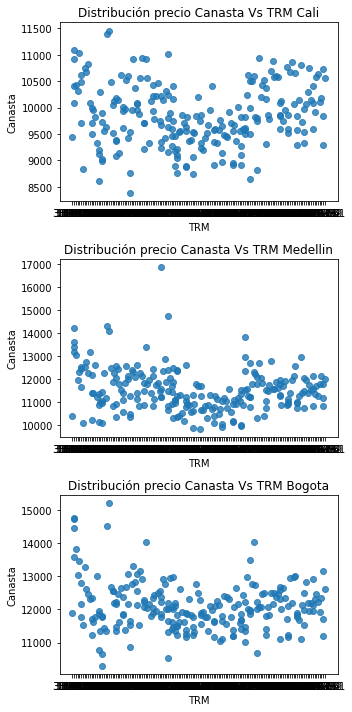

In [0]:
# Gráfico
# ==============================================================================

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(5, 10))

axs[0].scatter(x=trm_ciudades_2.TRM, y=trm_ciudades_2['Cali'], alpha= 0.8)
axs[0].set_title('Distribución precio Canasta Vs TRM Cali')
axs[0].set_xlabel('TRM')
axs[0].set_ylabel('Canasta')

axs[1].scatter(x=trm_ciudades_2.TRM, y=trm_ciudades_2['Medellín'], alpha= 0.8)
axs[1].set_title('Distribución precio Canasta Vs TRM Medellin')
axs[1].set_xlabel('TRM')
axs[1].set_ylabel('Canasta')

axs[2].scatter(x=trm_ciudades_2.TRM, y=trm_ciudades_2['Bogotá D.C.'], alpha= 0.8)
axs[2].set_title('Distribución precio Canasta Vs TRM Bogota')
axs[2].set_xlabel('TRM')
axs[2].set_ylabel('Canasta')


plt.tight_layout();


In [0]:
# File location and type
file_location = "/FileStore/tables/acpm.csv"
file_type = "csv"

# CSV options
infer_schema = "false"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
acpm = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(acpm)

fecha Armenia Barranquilla Bogotá Bucaramanga Cali Cartagena Cúcuta IBAGUE Manizales Medellín MONTERIA Neiva Pasto Pereira POPAYAN RIOHACHA SAN JOSE DE CUCUTA Santa Marta Sincelejo Tunja VALLEDUPAR Villavicencio YOPAL 1/30/2020 9528.00 9185.00 9456.00 9243.00 9566.00 9154.00 6682.00 9447.00 9506.00 9465.00 9404.00 9530.00 7552.00 9516.00 null null 6655.00 9285.00 9354.00 9590.00 null 9556.00 null 2/30/2020 9527.00 9184.00 9456.00 9242.00 9565.00 9154.00 6684.00 9446.00 9505.00 9464.00 9404.00 9529.00 7549.00 9515.00 null null 6634.00 9284.00 9354.00 9590.00 null 9556.00 null 3/30/2020 9405.00 9061.00 9333.00 9119.00 9443.00 9031.00 6684.00 9323.00 9383.00 9341.00 9281.00 9406.00 7549.00 9393.00 null null 6654.00 9161.00 9231.00 9467.00 null 9433.00 null 4/30/2020 8467.00 8297.00 8460.00 8072.00 8589.00 8352.00 null 8320.00 8441.00 8630.00 8666.00 8598.00 7591.00 8433.00 8914.00 6546.00 6711.00 8361.00 8425.00 8527.00 7432.00 8545.00 8574.00 5/30/2020 8438.00 8270.00 8456.00 8113.00 8560.00 8336.00 null 8334.00 8393.00 8603.00 8657.00 8598.00 7536.00 8429.00 8913.00 6957.00 6804.00 8348.00 8440.00 8502.00 7408.00 8548.00 8588.00 6/30/2020 8550.00 8294.00 8447.00 8052.00 8602.00 8356.00 null 8342.00 8480.00 8615.00 8654.00 8598.00 7554.00 8430.00 8915.00 7227.00 6905.00 8418.00 8319.00 8515.00 7508.00 8713.00 8605.00 7/30/2020 8392.00 8249.00 8410.00 8042.00 8558.00 8349.00 null 8282.00 8331.00 8600.00 8613.00 8554.00 7530.00 8366.00 8867.00 7282.00 7124.00 8330.00 8404.00 8451.00 7440.00 8497.00 8570.00 8/20/2020 8405.00 8178.00 8312.00 7928.00 8482.00 8239.00 null 8184.00 8249.00 8503.00 8662.00 8463.00 7530.00 8288.00 8801.00 7358.00 7061.00 8227.00 8214.00 8372.00 7320.00 8437.00 8453.00 9/30/2020 8292.00 8132.00 8325.00 7976.00 8506.00 8217.00 null 8177.00 8246.00 8524.00 8670.00 8463.00 7517.00 8288.00 8797.00 7433.00 6999.00 8201.00 8229.00 8372.00 7319.00 8400.00 8448.00 10/30/2020 8285.00 8196.00 8285.00 7911.00 8423.00 8184.00 null 8176.00 8245.00 8476.00 8608.00 8536.00 7521.00 8312.00 8775.00 7318.00 7034.00 8189.00 8194.00 8374.00 7359.00 8467.00 8481.00 11/30/2020 8279.00 8117.00 8255.00 7844.00 8411.00 8187.00 null 8174.00 8236.00 8479.00 8588.00 8460.00 7517.00 8269.00 8755.00 7255.00 7283.00 8159.00 8172.00 8460.00 7336.00 8383.00 8436.00 12/30/2020 8283.00 8157.00 8272.00 7869.00 8416.00 8180.00 null 8171.00 8234.00 8544.00 8570.00 8459.00 7556.00 8254.00 8762.00 7328.00 7604.00 8128.00 8156.00 8405.00 7463.00 8381.00 8433.00 1/30/2021 8336.00 8177.00 8350.00 7932.00 8521.00 8259.00 null 8282.00 8414.00 8564.00 8553.00 8522.00 7648.00 8326.00 8879.00 7395.00 7684.00 8246.00 8210.00 8444.00 7479.00 8481.00 8530.00 2/30/2021 8417.00 8211.00 8403.00 8009.00 8563.00 8319.00 null 8344.00 8403.00 8688.00 8693.00 8591.00 7798.00 8398.00 8925.00 7488.00 7475.00 8285.00 8261.00 8499.00 7498.00 8571.00 8600.00 3/30/2021 8572.00 8366.00 8573.00 8141.00 8688.00 8460.00 null 8512.00 8550.00 8820.00 8777.00 8731.00 7894.00 8531.00 9049.00 7770.00 7136.00 8389.00 8344.00 8659.00 7782.00 8654.00 8728.00 4/30/2021 8824.00 8441.00 8674.00 8261.00 8828.00 8581.00 null 8634.00 8685.00 8936.00 8919.00 8904.00 8056.00 8652.00 9175.00 7788.00 7244.00 8459.00 8472.00 8751.00 7961.00 8786.00 8912.00 5/30/2021 8703.00 8443.00 8696.00 8319.00 8876.00 8636.00 null 8626.00 8688.00 8930.00 8911.00 8827.00 7956.00 8682.00 9180.00 7728.00 7338.00 8589.00 8470.00 8778.00 7841.00 8829.00 8868.00 6/30/2021 8685.00 8439.00 8655.00 8246.00 8620.00 8581.00 null 8635.00 8676.00 8974.00 8903.00 8819.00 7841.00 8665.00 9147.00 7439.00 null 8551.00 8447.00 8782.00 7803.00 8976.00 8941.00 7/30/2021 8705.00 8476.00 8650.00 8246.00 8804.00 8577.00 null 8716.00 8677.00 8914.00 8904.00 8821.00 7919.00 8660.00 9205.00 7459.00 null 8463.00 8450.00 8804.00 7830.00 8796.00 8863.00 8/30/2021 8705.00 8439.00 8650.00 8241.00 8810.00 8586.00 null 8671.00 8674.00 8912.00 9014.00 8838.00 7955.00 8652.00 9200.00 7543.00 null 8587.00 8449.00 8783.00 7813.00 8787.00 886

In [0]:
acpm_2020=acpm.toPandas()
acpm_2020['fecha'] = acpm_2020['fecha'].str.replace('2/30/2020','2/28/2020')
acpm_2020['fecha'] = acpm_2020['fecha'].str.replace('2/30/2021','2/28/2021')
acpm_2020['fecha'] = acpm_2020['fecha'].str.replace('8/20/2020','8/31/2020')
acpm_2020['fecha'] = acpm_2020['fecha'].str.replace('10/30/2020','10/31/2020')
acpm_2020['fecha'] = acpm_2020['fecha'].str.replace('12/28/2020','12/31/2020')
acpm_2020['fecha'] = acpm_2020['fecha'].str.replace('1/30/2021','1/31/2021')
acpm_2020['fecha'] = acpm_2020['fecha'].str.replace('3/30/2021','3/31/2021')
acpm_2020['fecha'] = acpm_2020['fecha'].str.replace('/','-')

acpm_2020

Out[239]:

fecha 
 Armenia 
 Barranquilla 
 Bogotá 
 Bucaramanga 
 Cali 
 Cartagena 
 Cúcuta 
 IBAGUE 
 Manizales 
 Medellín 
 MONTERIA 
 Neiva 
 Pasto 
 Pereira 
 POPAYAN 
 RIOHACHA 
 SAN JOSE DE CUCUTA 
 Santa Marta 
 Sincelejo 
 Tunja 
 VALLEDUPAR 
 Villavicencio 
 YOPAL 
 
 
 
 
 0 
 1-30-2020 
 9528.00 
 9185.00 
 9456.00 
 9243.00 
 9566.00 
 9154.00 
 6682.00 
 9447.00 
 9506.00 
 9465.00 
 9404.00 
 9530.00 
 7552.00 
 9516.00 
 None 
 None 
 6655.00 
 9285.00 
 9354.00 
 9590.00 
 None 
 9556.00 
 None 
 
 
 1 
 2-28-2020 
 9527.00 
 9184.00 
 9456.00 
 9242.00 
 9565.00 
 9154.00 
 6684.00 
 9446.00 
 9505.00 
 9464.00 
 9404.00 
 9529.00 
 7549.00 
 9515.00 
 None 
 None 
 6634.00 
 9284.00 
 9354.00 
 9590.00 
 None 
 9556.00 
 None 
 
 
 2 
 3-30-2020 
 9405.00 
 9061.00 
 9333.00 
 9119.00 
 9443.00 
 9031.00 
 6684.00 
 9323.00 
 9383.00 
 9341.00 
 9281.00 
 9406.00 
 7549.00 
 9393.00 
 None 
 None 
 6654.00 
 9161.00 
 9231.00 
 9467.00 
 None 
 9433.00 
 None 
 
 
 3 
 4-30-2020 
 8467.00 
 8297.00 
 8460.00 
 8072.00 
 8589.00 
 8352.00 
 None 
 8320.00 
 8441.00 
 8630.00 
 8666.00 
 8598.00 
 7591.00 
 8433.00 
 8914.00 
 6546.00 
 6711.00 
 8361.00 
 8425.00 
 8527.00 
 7432.00 
 8545.00 
 8574.00 
 
 
 4 
 5-30-2020 
 8438.00 
 8270.00 
 8456.00 
 8113.00 
 8560.00 
 8336.00 
 None 
 8334.00 
 8393.00 
 8603.00 
 8657.00 
 8598.00 
 7536.00 
 8429.00 
 8913.00 
 6957.00 
 6804.00 
 8348.00 
 8440.00 
 8502.00 
 7408.00 
 8548.00 
 8588.00 
 
 
 5 
 6-30-2020 
 8550.00 
 8294.00 
 8447.00 
 8052.00 
 8602.00 
 8356.00 
 None 
 8342.00 
 8480.00 
 8615.00 
 8654.00 
 8598.00 
 7554.00 
 8430.00 
 8915.00 
 7227.00 
 6905.00 
 8418.00 
 8319.00 
 8515.00 
 7508.00 
 8713.00 
 8605.00 
 
 
 6 
 7-30-2020 
 8392.00 
 8249.00 
 8410.00 
 8042.00 
 8558.00 
 8349.00 
 None 
 8282.00 
 8331.00 
 8600.00 
 8613.00 
 8554.00 
 7530.00 
 8366.00 
 8867.00 
 7282.00 
 7124.00 
 8330.00 
 8404.00 
 8451.00 
 7440.00 
 8497.00 
 8570.00 
 
 
 7 
 8-31-2020 
 8405.00 
 8178.00 
 8312.00 
 7928.00 
 8482.00 
 8239.00 
 None 
 8184.00 
 8249.00 
 8503.00 
 8662.00 
 8463.00 
 7530.00 
 8288.00 
 8801.00 
 7358.00 
 7061.00 
 8227.00 
 8214.00 
 8372.00 
 7320.00 
 8437.00 
 8453.00 
 
 
 8 
 9-30-2020 
 8292.00 
 8132.00 
 8325.00 
 7976.00 
 8506.00 
 8217.00 
 None 
 8177.00 
 8246.00 
 8524.00 
 8670.00 
 8463.00 
 7517.00 
 8288.00 
 8797.00 
 7433.00 
 6999.00 
 8201.00 
 8229.00 
 8372.00 
 7319.00 
 8400.00 
 8448.00 
 
 
 9 
 10-31-2020 
 8285.00 
 8196.00 
 8285.00 
 7911.00 
 8423.00 
 8184.00 
 None 
 8176.00 
 8245.00 
 8476.00 
 8608.00 
 8536.00 
 7521.00 
 8312.00 
 8775.00 
 7318.00 
 7034.00 
 8189.00 
 8194.00 
 8374.00 
 7359.00 
 8467.00 
 8481.00 
 
 
 10 
 11-30-2020 
 8279.00 
 8117.00 
 8255.00 
 7844.00 
 8411.00 
 8187.00 
 None 
 8174.00 
 8236.00 
 8479.00 
 8588.00 
 8460.00 
 7517.00 
 8269.00 
 8755.00 
 7255.00 
 7283.00 
 8159.00 
 8172.00 
 8460.00 
 7336.00 
 8383.00 
 8436.00 
 
 
 11 
 12-31-2020 
 8283.00 
 8157.00 
 8272.00 
 7869.00 
 8416.00 
 8180.00 
 None 
 8171.00 
 8234.00 
 8544.00 
 8570.00 
 8459.00 
 7556.00 
 8254.00 
 8762.00 
 7328.00 
 7604.00 
 8128.00 
 8156.00 
 8405.00 
 7463.00 
 8381.00 
 8433.00 
 
 
 12 
 1-31-2021 
 8336.00 
 8177.00 
 8350.00 
 7932.00 
 8521.00 
 8259.00 
 None 
 8282.00 
 8414.00 
 8564.00 
 8553.00 
 8522.00 
 7648.00 
 8326.00 
 8879.00 
 7395.00 
 7684.00 
 8246.00 
 8210.00 
 8444.00 
 7479.00 
 8481.00 
 8530.00 
 
 
 13 
 2-28-2021 
 8417.00 
 8211.00 
 8403.00 
 8009.00 
 8563.00 
 8319.00 
 None 
 8344.00 
 8403.00 
 8688.00 
 8693.00 
 8591.00 
 7798.00 
 8398.00 
 8925.00 
 7488.00 
 7475.00 
 8285.00 
 8261.00 
 8499.00 
 7498.00 
 8571.00 
 8600.00 
 
 
 14 
 3-31-2021 
 8572.00 
 8366.00 
 8573.00 
 8141.00 
 8688.00 
 8460.00 
 None 
 8512.00 
 8550.00 
 8820.00 
 8777.00 
 8731.00 
 7894.00 
 8531.00 
 9049.00 
 7770.00 
 7136.00 
 8389.00 
 8344.00 
 8659.00 
 7782.00 
 8654.00 
 8728.00 
 
 
 15 
 4-30-2021 
 8824.00 
 8441.00 
 867

In [0]:
acpm_2020['fecha'] = pd.to_datetime(acpm_2020['fecha'])
acpm_2020['date'] = acpm_2020['fecha'].dt.strftime('%Y-%m-%d')
acpm_2020_3=acpm_2020.set_index(['date'])
acpm_ciudades=acpm_2020_3[['Cali','Medellín','Bogotá']]
acpm_ciudades=acpm_ciudades.rename(columns={'Cali':'Cali_acpm','Medellín':'Medellín_acpm','Bogotá':'Bogotá_acpm'})
#acpm_ciudades=acpm_ciudades.resample('M').mean()
acpm_ciudades

Out[240]:

Cali_acpm 
 Medellín_acpm 
 Bogotá_acpm 
 
 
 date 
 
 
 
 
 
 
 
 2020-01-30 
 9566.00 
 9465.00 
 9456.00 
 
 
 2020-02-28 
 9565.00 
 9464.00 
 9456.00 
 
 
 2020-03-30 
 9443.00 
 9341.00 
 9333.00 
 
 
 2020-04-30 
 8589.00 
 8630.00 
 8460.00 
 
 
 2020-05-30 
 8560.00 
 8603.00 
 8456.00 
 
 
 2020-06-30 
 8602.00 
 8615.00 
 8447.00 
 
 
 2020-07-30 
 8558.00 
 8600.00 
 8410.00 
 
 
 2020-08-31 
 8482.00 
 8503.00 
 8312.00 
 
 
 2020-09-30 
 8506.00 
 8524.00 
 8325.00 
 
 
 2020-10-31 
 8423.00 
 8476.00 
 8285.00 
 
 
 2020-11-30 
 8411.00 
 8479.00 
 8255.00 
 
 
 2020-12-31 
 8416.00 
 8544.00 
 8272.00 
 
 
 2021-01-31 
 8521.00 
 8564.00 
 8350.00 
 
 
 2021-02-28 
 8563.00 
 8688.00 
 8403.00 
 
 
 2021-03-31 
 8688.00 
 8820.00 
 8573.00 
 
 
 2021-04-30 
 8828.00 
 8936.00 
 8674.00 
 
 
 2021-05-30 
 8876.00 
 8930.00 
 8696.00 
 
 
 2021-06-30 
 8620.00 
 8974.00 
 8655.00 
 
 
 2021-07-30 
 8804.00 
 8914.00 
 8650.00 
 
 
 2021-08-30 
 8810.00 
 8912.00 
 8650.00

In [0]:
ciudades_acpm_canasta=ciudades[['Medellín','Cali','Bogotá D.C.']].join(acpm_ciudades)
ciudades_acpm_canasta

Out[242]:

Medellín 
 Cali 
 Bogotá D.C. 
 Cali_acpm 
 Medellín_acpm 
 Bogotá_acpm 
 
 
 
 
 2020-08-31 
 11002.703477 
 9387.928799 
 11780.592756 
 8482.00 
 8503.00 
 8312.00 
 
 
 2020-09-30 
 10759.134581 
 9488.223972 
 11788.423135 
 8506.00 
 8524.00 
 8325.00 
 
 
 2020-10-31 
 12088.219158 
 10098.372671 
 12599.438759 
 8423.00 
 8476.00 
 8285.00 
 
 
 2020-11-30 
 11564.990923 
 9804.593093 
 12088.142503 
 8411.00 
 8479.00 
 8255.00 
 
 
 2020-12-31 
 11882.525905 
 9945.214147 
 12247.684856 
 8416.00 
 8544.00 
 8272.00 
 
 
 2021-01-31 
 11799.567408 
 10008.576515 
 12060.284546 
 8521.00 
 8564.00 
 8350.00 
 
 
 2021-02-28 
 11529.227159 
 10065.590741 
 12113.174892 
 8563.00 
 8688.00 
 8403.00 
 
 
 2021-03-31 
 11502.166364 
 10186.099456 
 12190.151428 
 8688.00 
 8820.00 
 8573.00

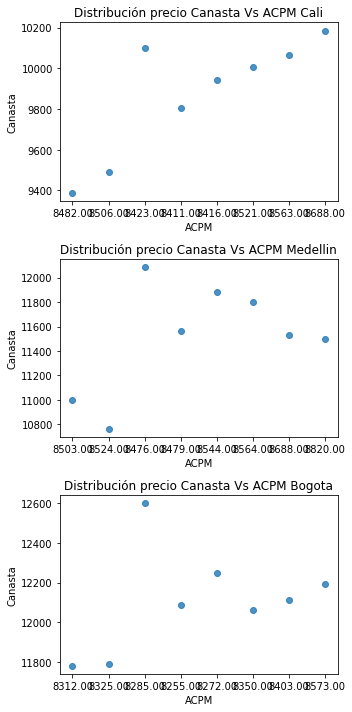

In [0]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(5, 10))

axs[0].scatter(x=ciudades_acpm_canasta.Cali_acpm, y=ciudades_acpm_canasta.Cali, alpha= 0.8)
axs[0].set_title('Distribución precio Canasta Vs ACPM Cali')
axs[0].set_xlabel('ACPM')
axs[0].set_ylabel('Canasta')

axs[1].scatter(x=ciudades_acpm_canasta.Medellín_acpm, y=ciudades_acpm_canasta.Medellín, alpha= 0.8)
axs[1].set_title('Distribución precio Canasta Vs ACPM Medellin')
axs[1].set_xlabel('ACPM')
axs[1].set_ylabel('Canasta')

axs[2].scatter(x=ciudades_acpm_canasta.Bogotá_acpm, y=ciudades_acpm_canasta['Bogotá D.C.'], alpha= 0.8)
axs[2].set_title('Distribución precio Canasta Vs ACPM Bogota')
axs[2].set_xlabel('ACPM')
axs[2].set_ylabel('Canasta')


plt.tight_layout();

## Conclusiones Exploracion de Datos

Segun lo observado y planteado como influencia principal se evidencio que factores externos como la TRM realmente no generan una fuerte infliencia en el precio promedio de la canasta famialia, mientras que si vemos el precio de la gasolina se, nota una pequeña correlacion mas marcada la cual se evidenciara en la construccion del modelo que nos ayudara a predecir el precio del siguiente mes de la misma